In [139]:
from chemprop.train.evaluate import evaluate_predictions

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import torch
from types import SimpleNamespace
import numpy as np
from sklearn.metrics import root_mean_squared_error, r2_score
from chemprop.train.spectral_loss import srmse

In [140]:
# === 1. Загрузка данных ===
real = pd.read_csv('/home/super_stas_69/Desktop/3D_only/MODELS/fold_0/test_full.csv')
pred = pd.read_csv('/home/super_stas_69/Desktop/3D_only/MODELS/fold_0/uv_preds.csv')


In [141]:
def scale_spectra(data):
    for i, row in data.iterrows():
        scaled_row = (row.values - np.min(row.values)) / (np.max(row.values) - np.min(row.values))
        data.loc[i] = scaled_row

    return data

In [142]:
pred_scaled = scale_spectra(pred.iloc[:, 1:])

pred

,smiles,lam_220,lam_221,lam_222,lam_223,lam_224,lam_225,lam_226,lam_227,lam_228,...,lam_391,lam_392,lam_393,lam_394,lam_395,lam_396,lam_397,lam_398,lam_399,lam_400
0,NNC(=O)C1=CC(Cl)=C(Cl)C=C1,3079.274792,2914.094946,3038.173523,2827.381287,2827.798914,2783.373633,2768.000537,2713.077832,2706.265088,...,1.634503,1.761586,1.726193,1.890579,1.697263,1.765421,1.257750,1.036890,1.445363,1.0
1,CCOc1ccc(NC(C)=O)cc1S(=O)(=O)NCCc1c[nH]c2ccccc12,5045.251416,4979.696606,4897.232495,4674.564917,4313.324731,4106.134302,3956.018213,3589.591785,3274.681396,...,1.595251,1.571529,1.808056,1.783463,1.640592,1.589932,1.341212,1.112805,1.181468,1.0
2,ClC1=CC=CC=C1N1CCNCC1,138.384866,137.366473,137.808319,137.293507,133.406017,133.927863,137.582861,141.687083,142.569902,...,1.024627,1.127537,0.980790,1.033965,1.201790,1.312750,0.836746,0.919091,0.996983,1.0
3,OC1=C(CC2=NC3=CC(Cl)=CC=C3O2)C=CC=C1,253.769934,293.993431,291.846242,273.665129,266.738911,250.709042,254.272523,245.509447,234.662985,...,1.943115,1.979624,1.935690,1.769792,1.733302,1.907919,1.503821,1.244210,1.347255,1.0
4,Cc1nc(sc1C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O...,5430.763672,5441.200732,5355.199805,5254.271362,5120.715259,4902.151855,4637.122095,4271.226953,3845.746289,...,2.403706,2.239366,2.466778,2.139643,2.027183,1.887960,1.713388,1.315665,1.383588,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,CS(=O)(=O)N1CCc2ccc(NS(=O)(=O)CCN3C(=O)c4ccccc...,116846.544531,109240.781250,107835.883203,99648.907422,94203.835156,83875.905469,81628.067969,72829.500977,69543.512109,...,2.270483,1.934811,2.349614,2.473963,2.124468,1.993698,1.714631,1.239681,1.450238,1.0
90,Cc1ccc(cc1)S(=O)(=O)NCCCC(O)=O,1218.624219,1240.832617,1293.856659,1325.247546,1353.629541,1364.961163,1372.960974,1397.472430,1409.428973,...,1.444235,0.853028,1.154474,1.554925,1.120059,1.438933,0.954882,0.903625,1.041248,1.0
91,COC(=O)CNC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)OC,14420.906836,14418.638379,14212.270215,14320.539746,14065.801172,13375.682812,12635.539893,11701.355371,10173.007715,...,1.315127,1.001193,1.331939,1.539679,1.136001,1.263570,1.256011,0.900917,0.961475,1.0
92,Cc1oc2cc3oc(=O)c(CC(=O)N[C@@H](Cc4c[nH]c5ccccc...,915.781989,871.880096,866.307068,831.054004,819.211896,774.750116,739.701517,656.073441,613.983197,...,3.238247,2.931404,3.194941,2.808546,2.524444,2.363056,2.145361,1.604079,1.594044,1.0


In [143]:
pred_scaled

,lam_220,lam_221,lam_222,lam_223,lam_224,lam_225,lam_226,lam_227,lam_228,lam_229,...,lam_391,lam_392,lam_393,lam_394,lam_395,lam_396,lam_397,lam_398,lam_399,lam_400
0,0.639927,0.605588,0.631383,0.587562,0.587649,0.578414,0.575218,0.563800,0.562384,0.591875,...,0.000132,0.000158,0.000151,0.000185,0.000145,0.000159,0.000054,0.000008,0.000093,0.000000
1,1.000000,0.987004,0.970656,0.926513,0.854899,0.813824,0.784064,0.711422,0.648993,0.618973,...,0.000118,0.000113,0.000160,0.000155,0.000127,0.000117,0.000068,0.000022,0.000036,0.000000
2,0.540919,0.536914,0.538652,0.536627,0.521339,0.523391,0.537765,0.553905,0.557377,0.596722,...,0.000739,0.001144,0.000566,0.000776,0.001436,0.001872,0.000000,0.000324,0.000630,0.000642
3,0.862715,1.000000,0.992672,0.930619,0.906979,0.852268,0.864431,0.834522,0.797502,0.806014,...,0.003219,0.003344,0.003194,0.002627,0.002503,0.003099,0.001720,0.000834,0.001185,0.000000
4,0.998081,1.000000,0.984192,0.965639,0.941089,0.900914,0.852197,0.784939,0.706729,0.659197,...,0.000258,0.000228,0.000270,0.000209,0.000189,0.000163,0.000131,0.000058,0.000071,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,1.000000,0.934908,0.922884,0.852817,0.806217,0.717827,0.698589,0.623289,0.595166,0.562978,...,0.000011,0.000008,0.000012,0.000013,0.000010,0.000009,0.000006,0.000002,0.000004,0.000000
90,0.856424,0.872043,0.909333,0.931410,0.951370,0.959339,0.964965,0.982203,0.990612,1.000000,...,0.000416,0.000000,0.000212,0.000494,0.000188,0.000412,0.000072,0.000036,0.000132,0.000103
91,1.000000,0.999843,0.985531,0.993040,0.975374,0.927516,0.876188,0.811404,0.705416,0.634506,...,0.000029,0.000007,0.000030,0.000044,0.000016,0.000025,0.000025,0.000000,0.000004,0.000007
92,1.000000,0.952008,0.945916,0.907379,0.894434,0.845830,0.807516,0.716098,0.670087,0.639014,...,0.002447,0.002111,0.002399,0.001977,0.001666,0.001490,0.001252,0.000660,0.000649,0.000000


In [144]:
real

,smiles,lam_220,lam_221,lam_222,lam_223,lam_224,lam_225,lam_226,lam_227,lam_228,...,lam_391,lam_392,lam_393,lam_394,lam_395,lam_396,lam_397,lam_398,lam_399,lam_400
0,NNC(=O)C1=CC(Cl)=C(Cl)C=C1,0.925723,0.874095,0.836007,0.809308,0.792226,0.786405,0.787923,0.796528,0.808928,...,0.000607,0.000329,0.000000,0.000569,0.000835,0.000936,0.000911,0.000101,0.000747,0.000544
1,CCOc1ccc(NC(C)=O)cc1S(=O)(=O)NCCc1c[nH]c2ccccc12,1.000000,0.985245,0.962247,0.929833,0.888178,0.835846,0.773364,0.704194,0.630917,...,0.000015,0.000164,0.000021,0.000117,0.000158,0.000150,0.000035,0.000082,0.000158,0.000173
2,ClC1=CC=CC=C1N1CCNCC1,0.912763,0.846759,0.799261,0.772997,0.755098,0.740099,0.734526,0.736410,0.745414,...,0.000240,0.000181,0.000442,0.000056,0.000359,0.000134,0.000111,0.000217,0.000000,0.000313
3,OC1=C(CC2=NC3=CC(Cl)=CC=C3O2)C=CC=C1,1.000000,0.940220,0.887257,0.841636,0.802307,0.767698,0.739381,0.718406,0.703199,...,0.000267,0.000037,0.000184,0.000094,0.000121,0.000000,0.000063,0.000047,0.000178,0.000288
4,Cc1nc(sc1C(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(O)=O...,1.000000,0.998565,0.987443,0.965199,0.931834,0.885552,0.828149,0.761418,0.689664,...,0.000025,0.000373,0.000093,0.000169,0.000100,0.000072,0.000133,0.000061,0.000187,0.000133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,CS(=O)(=O)N1CCc2ccc(NS(=O)(=O)CCN3C(=O)c4ccccc...,1.000000,0.964441,0.926167,0.881650,0.826819,0.767101,0.705755,0.642780,0.588491,...,0.000000,0.000407,0.001493,0.001276,0.001113,0.000624,0.000679,0.000434,0.000950,0.001249
90,Cc1ccc(cc1)S(=O)(=O)NCCCC(O)=O,0.755383,0.796871,0.841803,0.884582,0.922050,0.952483,0.977749,0.993684,1.000000,...,0.001048,0.000632,0.000962,0.000804,0.000861,0.000230,0.000890,0.001177,0.000345,0.000574
91,COC(=O)CNC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)OC,1.000000,0.999746,0.987136,0.961070,0.918797,0.860783,0.786392,0.700746,0.609176,...,0.000233,0.000085,0.000118,0.000123,0.000178,0.000178,0.000013,0.000127,0.000089,0.000017
92,Cc1oc2cc3oc(=O)c(CC(=O)N[C@@H](Cc4c[nH]c5ccccc...,0.996519,1.000000,0.996132,0.988010,0.969573,0.943658,0.909362,0.868621,0.821948,...,0.009314,0.007691,0.006267,0.004986,0.003828,0.002847,0.001953,0.001203,0.000558,0.000000


In [145]:
real_valu=real.iloc[:, 1:].values.tolist()
pred_valu=pred_scaled.values.tolist()
print(f"Len of real = {len(real_valu)}, len of pred = {len(pred_valu)}")

Len of real = 94, len of pred = 94


In [146]:
args = SimpleNamespace(
    metric='srmse',        # для спектров см. ниже про метрики
    batch_size=4,
    device='cpu'
)

In [147]:
model = None                   # не используется в SMSE/SRMSE/SID
num_tasks = len(pred_valu[0])      # 180, число точек спектра
dataset_type = 'spectra'

In [148]:
pred_valu

[[0.6399268918088036,
  0.6055884936187097,
  0.631382557909576,
  0.5875620318992296,
  0.5876488502426412,
  0.5784135045532227,
  0.5752176698685444,
  0.5638000680234359,
  0.5623838012907685,
  0.5918752251600188,
  0.5878694589725063,
  0.6455211073379752,
  0.63083893327551,
  0.7081799196632402,
  0.7343198895302814,
  0.7902528026728478,
  0.8160801407307788,
  0.8374908506022375,
  0.8909909062835215,
  0.9038481619141703,
  0.9468798925722224,
  0.953120957035558,
  1.0,
  0.933312620633266,
  0.9518935529355944,
  0.9256765499330276,
  0.8464007899139518,
  0.8272947375771178,
  0.7485661701387593,
  0.7015368496261325,
  0.6390380518414427,
  0.6015831309187629,
  0.5330167581734172,
  0.498144523094801,
  0.45752971594566727,
  0.39175865810977983,
  0.3410419789275549,
  0.3187756241884127,
  0.28959343801116993,
  0.251769143254398,
  0.2443993705411262,
  0.21247194505276892,
  0.19413282551318775,
  0.17101794784254795,
  0.1584676872489616,
  0.145183268341045,
  0.1

In [149]:
res = evaluate_predictions(model=None, preds=pred_valu, targets=pred_valu, metric_func=srmse, args=args, num_tasks=num_tasks, dataset_type=dataset_type)

 12%|█▎        | 3/24 [00:00<00:00, 26.54it/s]

model_spectra ; tensor([[6.3993e-01, 6.0559e-01, 6.3138e-01, 5.8756e-01, 5.8765e-01, 5.7841e-01,
         5.7522e-01, 5.6380e-01, 5.6238e-01, 5.9188e-01, 5.8787e-01, 6.4552e-01,
         6.3084e-01, 7.0818e-01, 7.3432e-01, 7.9025e-01, 8.1608e-01, 8.3749e-01,
         8.9099e-01, 9.0385e-01, 9.4688e-01, 9.5312e-01, 1.0000e+00, 9.3331e-01,
         9.5189e-01, 9.2568e-01, 8.4640e-01, 8.2729e-01, 7.4857e-01, 7.0154e-01,
         6.3904e-01, 6.0158e-01, 5.3302e-01, 4.9814e-01, 4.5753e-01, 3.9176e-01,
         3.4104e-01, 3.1878e-01, 2.8959e-01, 2.5177e-01, 2.4440e-01, 2.1247e-01,
         1.9413e-01, 1.7102e-01, 1.5847e-01, 1.4518e-01, 1.3124e-01, 1.2827e-01,
         1.1336e-01, 1.0457e-01, 9.4272e-02, 9.6053e-02, 8.9799e-02, 8.3240e-02,
         7.7820e-02, 7.7315e-02, 7.0676e-02, 6.3544e-02, 6.0259e-02, 5.7438e-02,
         5.3554e-02, 4.8542e-02, 4.8453e-02, 4.5718e-02, 4.0941e-02, 3.9235e-02,
         3.5808e-02, 3.4406e-02, 3.2584e-02, 2.8224e-02, 2.7392e-02, 2.5726e-02,
         2.5

 25%|██▌       | 6/24 [00:00<00:00, 21.17it/s]

tensor([[1.0000e+00, 9.6352e-01, 9.4671e-01, 8.9661e-01, 8.4790e-01, 8.0819e-01,
         7.7577e-01, 7.3100e-01, 6.9952e-01, 6.6820e-01, 6.0739e-01, 5.5646e-01,
         5.0202e-01, 4.6897e-01, 4.1269e-01, 3.8217e-01, 3.4405e-01, 3.0314e-01,
         2.6979e-01, 2.4138e-01, 2.0738e-01, 1.9160e-01, 1.6741e-01, 1.4426e-01,
         1.3193e-01, 1.1182e-01, 1.0090e-01, 9.1351e-02, 8.1104e-02, 7.4204e-02,
         6.8242e-02, 6.5826e-02, 6.0374e-02, 5.9487e-02, 5.7233e-02, 5.4988e-02,
         5.5360e-02, 5.3586e-02, 5.3721e-02, 5.2561e-02, 5.1575e-02, 4.9361e-02,
         5.0182e-02, 4.9571e-02, 4.9384e-02, 4.8135e-02, 4.8325e-02, 4.4496e-02,
         4.2971e-02, 4.1558e-02, 4.0384e-02, 3.7541e-02, 3.3766e-02, 3.4276e-02,
         3.1680e-02, 3.0438e-02, 2.8933e-02, 2.7495e-02, 2.4615e-02, 2.2103e-02,
         2.1071e-02, 1.9736e-02, 1.8273e-02, 1.8611e-02, 1.6418e-02, 1.4212e-02,
         1.3946e-02, 1.2874e-02, 1.2753e-02, 1.2213e-02, 1.2340e-02, 1.2637e-02,
         1.1389e-02, 1.0856e

 38%|███▊      | 9/24 [00:00<00:00, 18.12it/s]

tensor([[9.4150e-01, 1.0000e+00, 9.9730e-01, 9.8698e-01, 9.6525e-01, 9.3693e-01,
         8.8676e-01, 8.3339e-01, 7.5969e-01, 7.0222e-01, 6.4273e-01, 5.7562e-01,
         5.2046e-01, 4.7253e-01, 4.2557e-01, 3.9573e-01, 3.6438e-01, 3.3671e-01,
         3.1757e-01, 2.9894e-01, 2.8568e-01, 2.6700e-01, 2.5849e-01, 2.5093e-01,
         2.4273e-01, 2.3195e-01, 2.2375e-01, 2.2031e-01, 2.1130e-01, 2.1002e-01,
         2.0414e-01, 2.0368e-01, 2.0511e-01, 2.0451e-01, 2.0660e-01, 1.9836e-01,
         2.0142e-01, 2.0309e-01, 2.0194e-01, 2.0527e-01, 2.0781e-01, 2.0791e-01,
         2.1211e-01, 2.1054e-01, 2.1006e-01, 2.1474e-01, 2.2012e-01, 2.1761e-01,
         2.2253e-01, 2.2379e-01, 2.2464e-01, 2.2922e-01, 2.2965e-01, 2.2999e-01,
         2.3253e-01, 2.3253e-01, 2.3100e-01, 2.3138e-01, 2.2966e-01, 2.3356e-01,
         2.3833e-01, 2.3134e-01, 2.2616e-01, 2.2712e-01, 2.1668e-01, 2.1099e-01,
         2.0251e-01, 1.9183e-01, 1.8457e-01, 1.7453e-01, 1.7366e-01, 1.6655e-01,
         1.5919e-01, 1.4618e

 67%|██████▋   | 16/24 [00:01<00:00, 14.81it/s]

tensor([[1.0000e+00, 9.8141e-01, 1.0000e+00, 9.6269e-01, 9.9896e-01, 9.6629e-01,
         9.4828e-01, 8.9425e-01, 8.6209e-01, 8.2198e-01, 7.9083e-01, 7.2625e-01,
         6.9067e-01, 6.5198e-01, 5.7284e-01, 5.4699e-01, 5.0071e-01, 4.6179e-01,
         4.1980e-01, 3.9714e-01, 3.6831e-01, 3.5114e-01, 3.4751e-01, 3.1989e-01,
         3.0133e-01, 2.8400e-01, 2.7606e-01, 2.6316e-01, 2.5145e-01, 2.4269e-01,
         2.4519e-01, 2.3173e-01, 2.3403e-01, 2.3153e-01, 2.3489e-01, 2.4351e-01,
         2.4353e-01, 2.4995e-01, 2.5399e-01, 2.6476e-01, 2.7609e-01, 2.6898e-01,
         2.9397e-01, 2.9942e-01, 3.0881e-01, 3.2967e-01, 3.3671e-01, 3.3760e-01,
         3.5630e-01, 3.6210e-01, 3.5925e-01, 3.9066e-01, 4.0776e-01, 4.0950e-01,
         4.2991e-01, 4.2592e-01, 4.3135e-01, 4.2497e-01, 4.1524e-01, 4.1566e-01,
         4.0548e-01, 4.2484e-01, 4.2784e-01, 4.3219e-01, 4.2519e-01, 4.1012e-01,
         4.1658e-01, 4.0926e-01, 3.9376e-01, 3.8439e-01, 4.1056e-01, 4.0082e-01,
         3.9559e-01, 3.9226e

100%|██████████| 24/24 [00:01<00:00, 18.50it/s]

tensor([[9.9179e-01, 9.8551e-01, 1.0000e+00, 9.9829e-01, 9.8923e-01, 9.6190e-01,
         9.7588e-01, 9.5833e-01, 9.3864e-01, 9.5531e-01, 9.2416e-01, 9.1076e-01,
         8.7013e-01, 8.5206e-01, 8.1803e-01, 7.8447e-01, 7.5779e-01, 6.8821e-01,
         6.5501e-01, 5.9869e-01, 5.5131e-01, 5.1771e-01, 4.6482e-01, 4.2011e-01,
         3.8779e-01, 3.4103e-01, 3.0849e-01, 2.9095e-01, 2.5313e-01, 2.2539e-01,
         2.1011e-01, 1.8941e-01, 1.7752e-01, 1.6310e-01, 1.5444e-01, 1.4391e-01,
         1.3873e-01, 1.3029e-01, 1.2324e-01, 1.1830e-01, 1.0951e-01, 1.0785e-01,
         1.0164e-01, 9.8144e-02, 9.6986e-02, 9.4060e-02, 9.3971e-02, 8.8442e-02,
         8.6949e-02, 8.2235e-02, 7.9776e-02, 7.8446e-02, 7.0846e-02, 7.0442e-02,
         6.7845e-02, 6.4597e-02, 6.3030e-02, 5.8643e-02, 5.4195e-02, 5.0331e-02,
         4.7530e-02, 4.4862e-02, 4.1150e-02, 4.2714e-02, 3.7765e-02, 3.3431e-02,
         3.2505e-02, 3.1105e-02, 2.8452e-02, 2.6504e-02, 2.6111e-02, 2.6786e-02,
         2.5011e-02, 2.3168e

In [150]:
res

[0.09379667043685913,
 0.3754817247390747,
 0.22077788412570953,
 0.7801755666732788,
 0.5982489585876465,
 0.6633802056312561,
 0.22046837210655212,
 0.10416793823242188,
 0.2598612606525421,
 0.28260648250579834,
 0.27068445086479187,
 0.48435306549072266,
 0.11894410848617554,
 0.12165459990501404,
 0.41059309244155884,
 0.6351940631866455,
 0.09840794652700424,
 0.3255164325237274,
 0.6978561878204346,
 0.164018914103508,
 0.11282452195882797,
 0.05426114797592163,
 0.7058519124984741,
 0.10921870172023773,
 0.31839752197265625,
 0.26319941878318787,
 0.09238260984420776,
 0.7822405695915222,
 0.4492643177509308,
 0.8117470145225525,
 0.32904544472694397,
 0.47185835242271423,
 0.40684714913368225,
 0.7191182971000671,
 0.22315895557403564,
 0.26626479625701904,
 0.5717985033988953,
 0.4379652142524719,
 0.2618301510810852,
 0.12123510241508484,
 0.2635224461555481,
 0.585363507270813,
 0.13607414066791534,
 0.3043549656867981,
 0.14854900538921356,
 0.11390431225299835,
 0.7669815

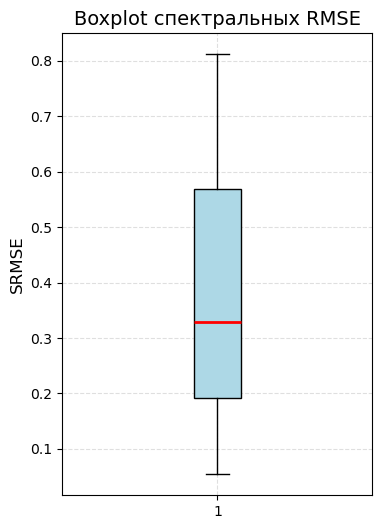

In [151]:
plt.figure(figsize=(4, 6))
plt.boxplot(res, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.title("Boxplot спектральных RMSE", fontsize=14)
plt.ylabel("SRMSE", fontsize=12)
plt.grid(alpha=0.4, linestyle="--")
plt.show()